In [2]:
import pygmt
import pandas as pd
import numpy as np
import scipy as scipy
from matplotlib.path import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import xarray as xr
import verde as vd
# For projecting data
import pyproj
# For fetching sample datasets
#import ensaio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LogNorm, PowerNorm
#import dask

# Load Moho Data from Receiver Function Studies

In [57]:
#Loading only Lat, Long, Moho_km
# Define file path
#path_to_data_file = r"D:\Amitava\Projects\Spline_Moho\Global_moho_compilation\Global_crust.csv"
path_to_data_file = r"D:\Amitava\Projects\Spline_Moho\Global_moho_compilation\Global_crust_Hk.csv" # dataset with only Hk

# Load only required columns while ignoring commented lines
#data_eq_raw = pd.read_csv(path_to_data_file, comment='#', usecols=["Lat", "Long", "Moho_km"])
data_eq_all = pd.read_csv(path_to_data_file, comment='#', usecols=["Lat", "Long", "Moho_km"])
'''
# Convert Moho_km to numeric, forcing non-numeric values to NaN
#data_eq_raw["Moho_km"] = pd.to_numeric(data_eq_raw["Moho_km"], errors="coerce")
data_eq["Moho_km"] = pd.to_numeric(data_eq_raw["Moho_km"], errors="coerce")

# Drop rows with NaN values in Moho_km
data_eq_all = data_eq_raw.dropna(subset=["Moho_km"]).reset_index(drop=True)

# Check for duplicate (Lat, Long, Moho_km) groups
duplicate_mask = data_eq_all.duplicated(subset=["Lat", "Long", "Moho_km"], keep=False)

# Count duplicate entries
num_duplicates = duplicate_mask.sum()
# Count unique groups that are duplicated
num_repeated_groups = data_eq_all.loc[duplicate_mask, ["Lat", "Long", "Moho_km"]].drop_duplicates().shape[0]

print(f"Total number of repeated (Lat, Long, Moho_km) rows: {num_duplicates}")
print(f"Number of unique (Lat, Long, Moho_km) groups that are repeated: {num_repeated_groups}")

# Keep only the first occurrence of each duplicate group
data_eq = data_eq_all.drop_duplicates(subset=["Lat", "Long", "Moho_km"], keep="first").reset_index(drop=True)
'''
# Display the final DataFrame

# Filter data based on longitude and latitude
data_eq_ind = data_eq_all[
    (data_eq_all["Long"] >= 65) & (data_eq_all["Long"] <= 110) & 
    (data_eq_all["Lat"] >= 5) & (data_eq_all["Lat"] <= 45)
].reset_index(drop=True)

data_eq = data_eq_all
eq_info = data_eq
data_eq

,Lat,Long,Moho_km
0,-90.00,0.00,38.0
1,-90.00,140.00,26.0
2,-89.93,144.36,40.0
3,-89.93,145.00,39.0
4,-87.42,-149.43,35.0
...,...,...,...
20879,78.92,11.94,27.0
20880,78.93,11.94,28.0
20881,80.05,-86.42,27.0
20882,81.60,-16.66,32.0


In [58]:
'''
# Count lines starting with '#'
num_commented_lines = sum(1 for line in open(path_to_data_file, 'r') if line.startswith('#'))

# Count NaN values in Moho_km
num_nans = data_eq_raw["Moho_km"].isna().sum()

print(f"Number of lines ignored due to comments: {num_commented_lines}")
print(f"Number of NaN values in Moho_km: {num_nans}")
'''

'\n# Count lines starting with \'#\'\nnum_commented_lines = sum(1 for line in open(path_to_data_file, \'r\') if line.startswith(\'#\'))\n\n# Count NaN values in Moho_km\nnum_nans = data_eq_raw["Moho_km"].isna().sum()\n\nprint(f"Number of lines ignored due to comments: {num_commented_lines}")\nprint(f"Number of NaN values in Moho_km: {num_nans}")\n'

In [59]:
#region = [65, 110, 5, 45]
region = [-180, 180, -90, 90]  # Covers the whole world
#region = [-180, 180, -89.9, 89.9] #avoids the poles
print(region)

[-180, 180, -90, 90]


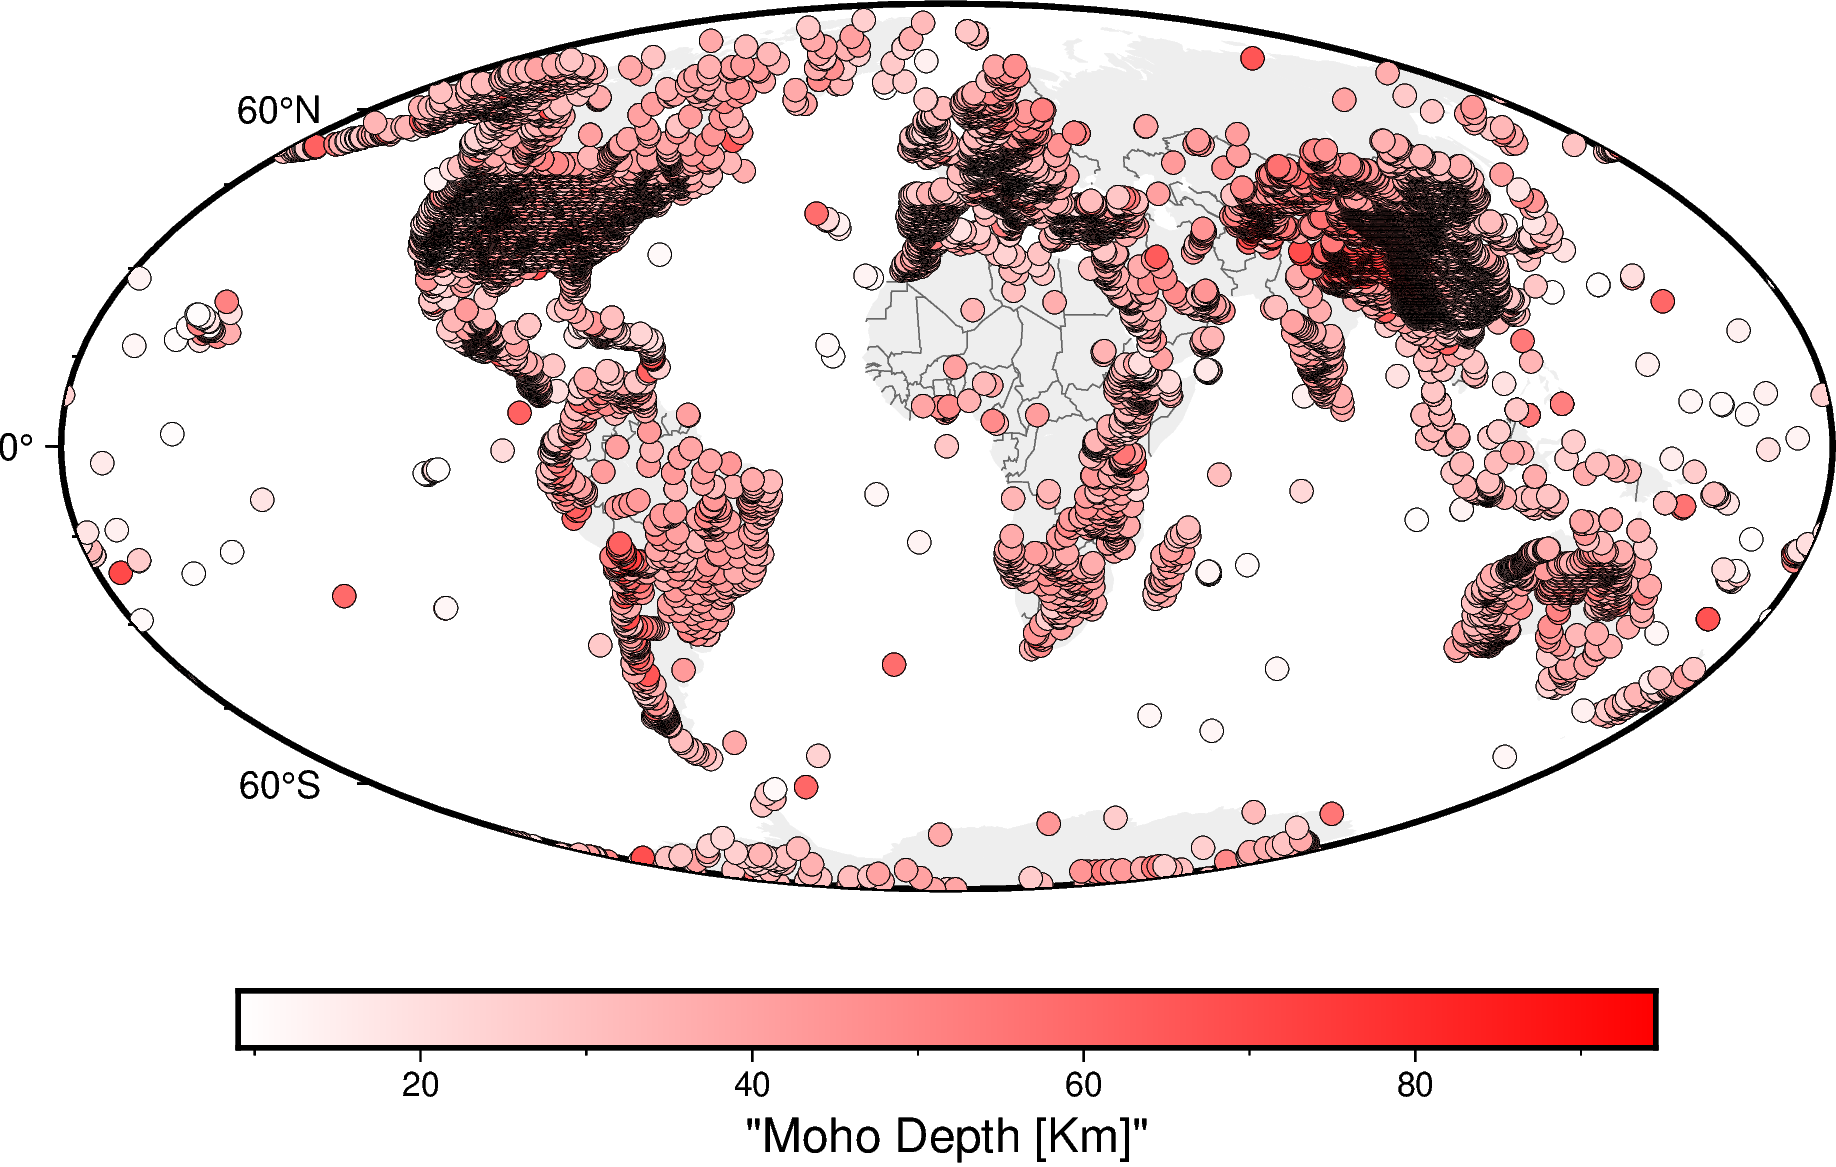

In [60]:

# Start a figure
fig = pygmt.Figure()
# Add a basemap with the data region, Mercator projection, default frame
# and ticks, color in the continents, and display national borders
fig.coast(
    region=region, projection="W15c", frame="af",
    land="#eeeeee", borders="1/#666666", area_thresh=1e4,
)
# Create a colormap for the Moho Depth
pygmt.makecpt(
    cmap="polar+h",
    series=[data_eq_all.Moho_km.min(), data_eq_all.Moho_km.max()],
    #series = [data.iloc[:, 5].min(), data.iloc[:, 5].max()],
)
# Plot colored points for the velocities
fig.plot(
    x=data_eq_all.Long,
    y=data_eq_all.Lat,
    fill=data_eq_all.Moho_km,
    style="c0.2c",
    cmap=True,
    pen="0.001p,black",
)
# Add a colorbar with automatic frame and ticks and a label
fig.colorbar(frame='af+l"Moho Depth [Km]"')
fig.show()


# Load Topography

## pyGMT

In [61]:
#topography =pygmt.datasets.load_earth_relief(resolution="01m", region="g")

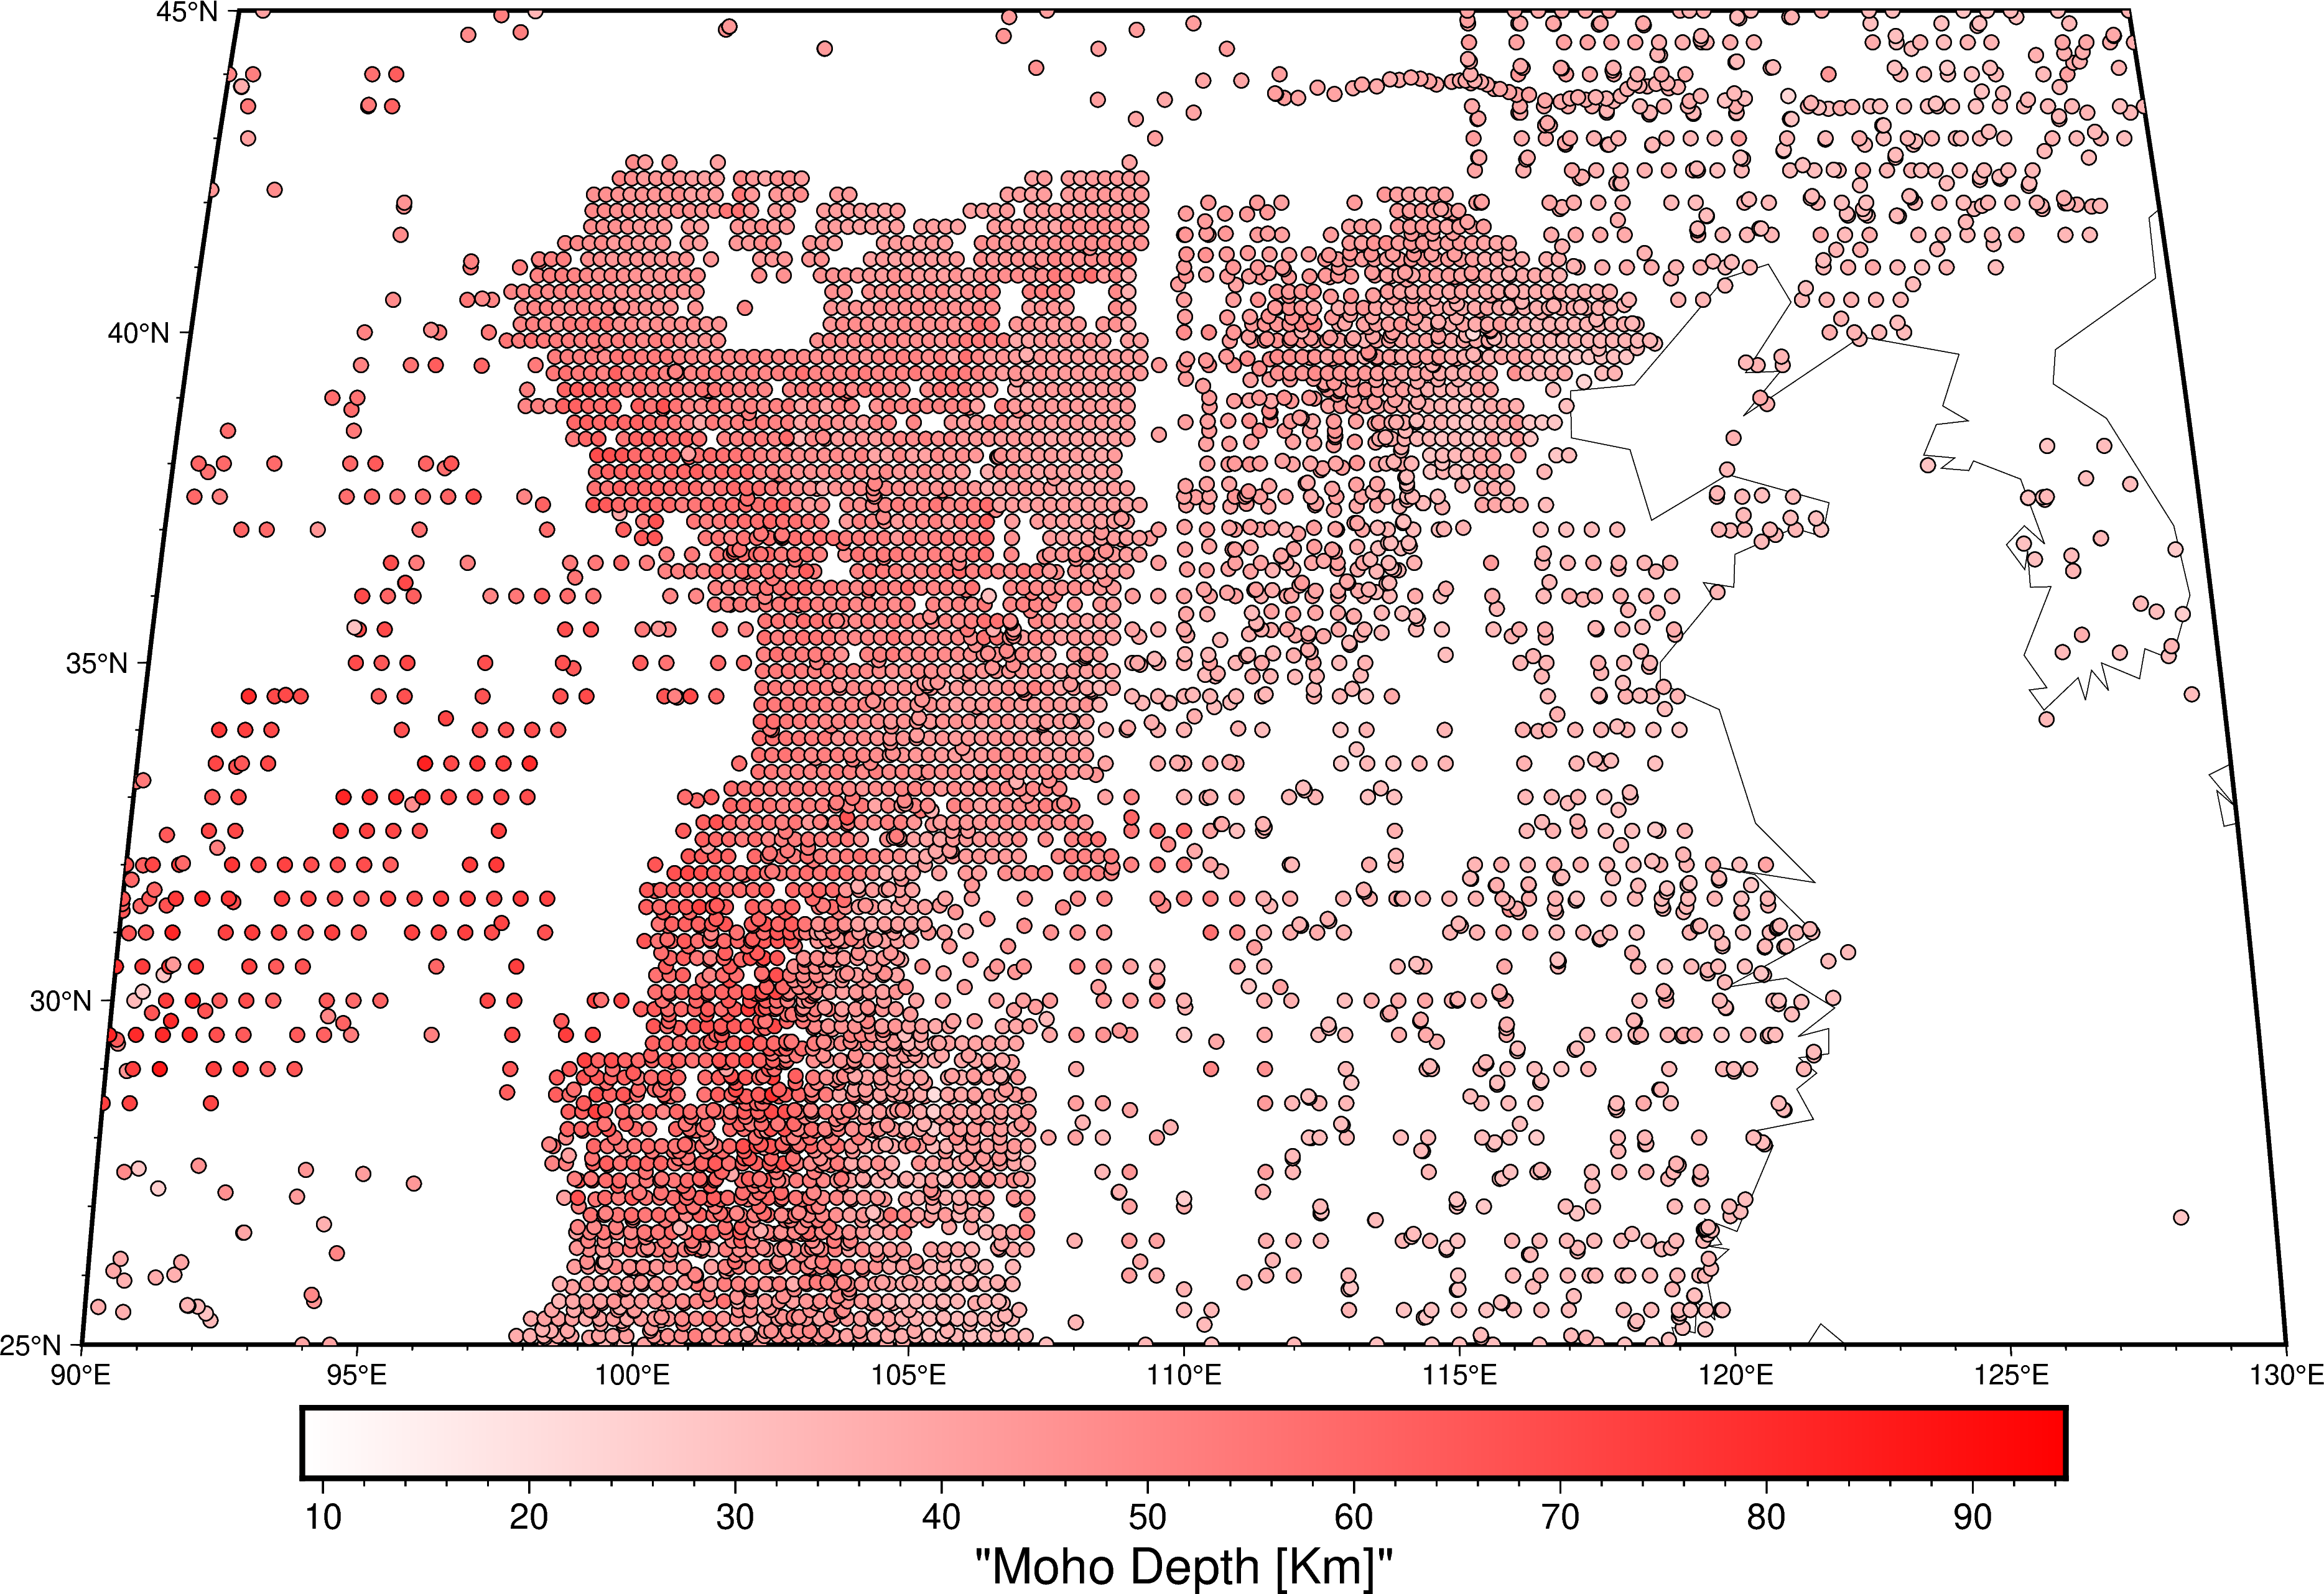

In [62]:
fig = pygmt.Figure()
fig.basemap(
    #region="g", # for the entire world
    region = [90, 130, 25, 45], #[Min Longitude, Max Longitude, Min Latitude, Max Latitude]
    projection="W30c",
    frame=True,
)
#fig.grdimage(data_topo, cmap="etopo1", shading="+nt0.5")
#fig.colorbar(frame='af+l"topography [m]"')
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
# Create a colormap for the Moho Depth
pygmt.makecpt(
    cmap="polar+h",
    series=[data_eq.Moho_km.min(), data_eq.Moho_km.max()],
    #series = [data.iloc[:, 5].min(), data.iloc[:, 5].max()],
)
# Plot colored points for the velocities
fig.plot(
    x=data_eq.Long,
    y=data_eq.Lat,
    fill=data_eq.Moho_km,
    style="c0.2c",
    cmap=True,
    pen="0.5p,black",
)
# Add a colorbar with automatic frame and ticks and a label
fig.colorbar(frame='af+l"Moho Depth [Km]"')
fig.show()
#fig.savefig("/home/amitava/Geodynamics-Project-IISERP/India_Tibet/RF_India/moho_depth_map.png", dpi=300)

# Load Crust1.0

In [63]:
#path_to_data_file_moho = "/home/amitava/Geodynamics-Project-IISERP/tomo/crust_ind.csv" ## for Ubuntu
#path_to_data_file_moho = r"D:\Amitava_Laptop\Geodynamics-Project-IISERP\tomo\crust.csv"
path_to_data_file_moho = r"D:\Amitava\Projects\Spline_Moho\Global_moho_compilation\Crust1.0\crust.csv"
#path_to_data_file_moho = "/home/amitava/Geodynamics-Project-IISERP/India_Tibet/RF_India/Crustal_thickness.csv"
#path_to_data_file = "/home/amitava/Geodynamics-Project-IISERP/India_Tibet/RF_India/TEC26522-mmc2_aug.csv"

# Read the file again with the extracted header
data_raw = pd.read_csv(path_to_data_file_moho, sep=r'\s+') ## sep is used instead of delim_whitespace = true as it will be removed in latest pandas
data_moho_all = data_raw.dropna()

# Apply the filtering criteria
data_moho_ind = data_moho_all[
    (data_moho_all["longitude"] >= 65) & (data_moho_all["longitude"] <= 110) & 
    (data_moho_all["latitude"] >= 5) & (data_moho_all["latitude"] <= 45)
].reset_index(drop=True)

data_moho = data_moho_all

crust1_moho = data_moho
data_moho

,longitude,latitude,Moho
0,-179.5,89.5,8.06
1,-178.5,89.5,8.08
2,-177.5,89.5,8.08
3,-176.5,89.5,8.09
4,-175.5,89.5,8.09
...,...,...,...
64795,175.5,-89.5,39.00
64796,176.5,-89.5,39.00
64797,177.5,-89.5,39.00
64798,178.5,-89.5,39.00


# Ensure numeric types for latitude and longitude

In [64]:
data_moho["longitude"] = pd.to_numeric(data_moho["longitude"], errors="coerce")
data_moho["latitude"] = pd.to_numeric(data_moho["latitude"], errors="coerce")
data_eq["Long"] = pd.to_numeric(data_eq["Long"], errors="coerce")
data_eq["Lat"] = pd.to_numeric(data_eq["Lat"], errors="coerce")

# Plotting Function

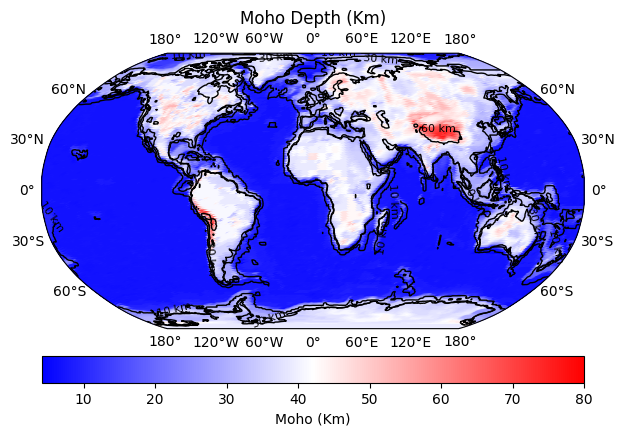

In [65]:
def plot_moho(coordinates, moho, title_data):
    "Plot Moho data on a single map with real contour lines"
    fig, ax = plt.subplots(
        figsize=(7, 7),
        subplot_kw=dict(projection=ccrs.Robinson())
    )

    crs = ccrs.PlateCarree()
    lon, lat = coordinates

    region = [lon.min(), lon.max(), lat.min(), lat.max()]
    ax.set_extent(region, crs=crs)
    ax.coastlines()
    ax.gridlines(draw_labels=True, crs=crs, alpha=0)
    ax.set_title(title_data)

    # Interpolate to grid
    xi = np.linspace(lon.min(), lon.max(), 300)
    yi = np.linspace(lat.min(), lat.max(), 300)
    xi, yi = np.meshgrid(xi, yi)
    #zi = griddata((lon, lat), moho, (xi, yi), method='linear')
    # Create the interpolator
    interp = scipy.interpolate.NearestNDInterpolator(list(zip(lon, lat)), moho)

    # Interpolate and reshape to match the grid shape
    zi = interp(xi.ravel(), yi.ravel()).reshape(xi.shape)

    # Plot scatter data
    pc = ax.scatter(
        lon, lat,
        c=moho,
        s=30,
        cmap="bwr",
        vmin=np.nanmin(moho),
        vmax=np.nanmax(moho),
        transform=crs,
    )

    # Add real contour lines
    contours = ax.contour(
        xi, yi, zi,
        levels=[10, 30, 60],
        colors='k',
        linewidths=1,
        transform=crs
    )
    ax.clabel(contours, inline=True, fontsize=8, fmt='%d km')

    plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05).set_label("Moho (Km)")
    return fig  # Return the figure to be handled later


# Example usage:
fig = plot_moho(
    (data_moho.longitude, data_moho.latitude),
    data_moho.Moho,
    "Moho Depth (Km)"
)
plt.show()

# Spline Interpolation

In [66]:
data = data_eq
coordinates=(data.Long, data.Lat)
moho=data.Moho_km
data
#print (moho)

,Lat,Long,Moho_km
0,-90.00,0.00,38.0
1,-90.00,140.00,26.0
2,-89.93,144.36,40.0
3,-89.93,145.00,39.0
4,-87.42,-149.43,35.0
...,...,...,...
20879,78.92,11.94,27.0
20880,78.93,11.94,28.0
20881,80.05,-86.42,27.0
20882,81.60,-16.66,32.0


# Projection, Coordinates, Region and Spacing

In [67]:
coordinates = (data.Long.values, data.Lat.values)
region = vd.get_region(coordinates)

# Use a Mercator projection for our Cartesian gridder
projection = pyproj.Proj(proj="merc", lat_ts=data.Lat.mean())
print(region)
print(coordinates)

# The output grid spacing will 6 arc-minutes. If n/60 then x arc minutes
#spacing = 6 / 60
spacing = 1

(np.float64(-179.42), np.float64(179.952), np.float64(-90.0), np.float64(82.5))
(array([  0.  , 140.  , 144.36, ..., -86.42, -16.66, -62.35]), array([-90.  , -90.  , -89.93, ...,  80.05,  81.6 ,  82.5 ]))


### Spline weighted

In [68]:
%%time
# This spline will automatically perform cross-validation and search for the optimal parameter configuration.
spline = vd.SplineCV(dampings=(1e-5, 1e-3))

spline.fit(projection(*coordinates), data.Moho_km)

# Spline Score and Dampings: Use only when usinge SplineCV otherwise comment the Score and Damping Prints
# We can show the best R² score obtained in the cross-validation
#print("\nScore: {:.3f}".format(spline.scores_.max())) # only for SplineCV

# And then the best damping parameter that produced this high score.
#print("\nBest damping:", spline.damping_) # only for SplineCV

# Now we can create a geographic grid of air temperature by providing a
# projection function to the grid method and mask points that are too far from
# the observations
grid_full = spline.grid(
    region=region,
    spacing=spacing,
    projection=projection,
    dims=["latitude", "longitude"],
    data_names="moho",
)

grid = vd.distance_mask(
    coordinates, maxdist=3 * spacing * 111e3, grid=grid_full, projection=projection
)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\verde\spline.py:245: FutureWarning: The mindist parameter of verde.Spline is no longer required and will be removed in Verde 2.0.0. Use the default value to obtain the future behavior.
  spline = Spline(**params)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:129: FutureWarning: The mindist parameter of verde.Spline is no longer required and will be removed in Verde 2.0.0. Use the default value to obtain the future behavior.
  new_object = klass(**new_object_params)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\verde\model_selection.py:784: FutureWarning: The default scoring will change from R² to negative root mean squared error (RMSE) in Verde 2.0.0. This may change model selection results slightly.
  score = estimator.score(*test_data)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:129: FutureWarning: The 

CPU times: total: 1h 8min 57s
Wall time: 8min 52s


In [69]:
grid_full

<xarray.Dataset> Size: 503kB
Dimensions:    (latitude: 173, longitude: 360)
Coordinates:
  * longitude  (longitude) float64 3kB -179.4 -178.4 -177.4 ... 179.0 180.0
  * latitude   (latitude) float64 1kB -90.0 -89.0 -87.99 ... 80.49 81.5 82.5
Data variables:
    moho       (latitude, longitude) float64 498kB 46.12 46.09 ... 48.99 48.91
Attributes:
    metadata:  Generated by SplineCV(dampings=(1e-05, 0.001), mindists=[0])

In [70]:
grid_df = grid.to_dataframe().reset_index()
grid_full_df = grid_full.to_dataframe().reset_index()
# Optional: drop NaNs if there's a distance mask applied
spline_df = grid_full_df.dropna(subset=["moho"]).reset_index(drop=True)


spline_df

,latitude,longitude,moho
0,-90.0,-179.420000,46.123454
1,-90.0,-178.418964,46.092022
2,-90.0,-177.417928,46.060475
3,-90.0,-176.416891,46.028812
4,-90.0,-175.415855,45.997034
...,...,...,...
62275,82.5,175.947855,49.215299
62276,82.5,176.948891,49.139865
62277,82.5,177.949928,49.064150
62278,82.5,178.950964,48.988206


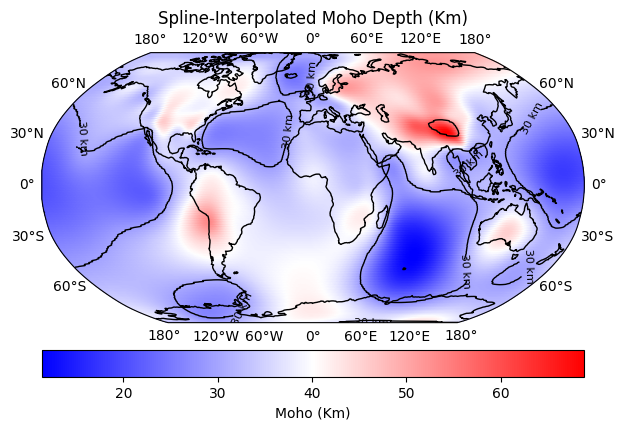

In [71]:
# Make sure there are no NaNs
#spline_df_clean = spline_df.dropna(subset=["moho"])

# Call your function with spline_df
fig = plot_moho(
    (spline_df.longitude, spline_df.latitude),
    spline_df.moho,
    "Spline-Interpolated Moho Depth (Km)"
)
plt.show()

In [88]:
# Crust1.0 lat,long with no rf
# Extract coordinates and RF Moho values
rf_lat = data_eq.Lat.values
rf_lon = data_eq.Long.values
rf_moho = data_eq.Moho_km.values

rf_coords = set(zip(rf_lat, rf_lon))

grid_full_df_no_rf = data_moho[~data_moho[["latitude", "longitude"]].apply(tuple, axis=1).isin(rf_coords)].reset_index(drop=True)
#####
# e.g., if lat=10 & long=20 then tuple makes it (10, 20)
# isin(rf_coords) returns a boolean True where those coordinates are present and ~ inverts the boolean to False meaning where those are not present
# data_moho(2) the coordiantes from this df is used
# data_moho(1) the master df from which we get the filtered row based on conditions
# .reset_index(drop=True) : resets the old index ,i.e., from the master df
#####

In [89]:
grid_full_df_no_rf

,longitude,latitude,Moho
0,-179.5,89.5,8.06
1,-178.5,89.5,8.08
2,-177.5,89.5,8.08
3,-176.5,89.5,8.09
4,-175.5,89.5,8.09
...,...,...,...
64451,175.5,-89.5,39.00
64452,176.5,-89.5,39.00
64453,177.5,-89.5,39.00
64454,178.5,-89.5,39.00


In [90]:
#Get Spline Moho Values
lats = grid_full.latitude.values
lons = grid_full.longitude.values
moho = grid_full.moho.values

lon_grid, lat_grid = np.meshgrid(lons, lats)
points = np.column_stack([lat_grid.ravel(), lon_grid.ravel()]) # Flatten the values using ravel
values = moho.ravel()

get_spline_moho = scipy.interpolate.NearestNDInterpolator(points, values)

target_lats = grid_full_df_no_rf["latitude"].values
target_lons = grid_full_df_no_rf["longitude"].values

spline_moho_values = get_spline_moho(target_lats, target_lons)

#projected_coords = projection(grid_full_df_no_rf["longitude"].values,grid_full_df_no_rf["latitude"].values)
#spline.predict

grid_full_df_no_rf["spline_moho"] = spline_moho_values
grid_full_df_no_rf

,longitude,latitude,Moho,spline_moho
0,-179.5,89.5,8.06,32.176795
1,-178.5,89.5,8.08,32.232997
2,-177.5,89.5,8.08,32.287375
3,-176.5,89.5,8.09,32.339854
4,-175.5,89.5,8.09,32.390359
...,...,...,...,...
64451,175.5,-89.5,39.00,23.742276
64452,176.5,-89.5,39.00,23.682505
64453,177.5,-89.5,39.00,23.622976
64454,178.5,-89.5,39.00,23.563684


In [95]:
df_rf = data_eq[["Lat", "Long", "Moho_km"]].copy()
df_rf.columns = ["Latitude", "Longitude", "Moho"]

lat = grid_full_df_no_rf["latitude"].values
lon = grid_full_df_no_rf["longitude"].values
moho_crust = grid_full_df_no_rf["Moho"].values
spline_moho = grid_full_df_no_rf["spline_moho"].values

moho_final = np.where(abs(moho_crust - spline_moho) <= 3, spline_moho, moho_crust) ## (Condition, if true: execute, else: execute)

df_crust = pd.DataFrame({"Latitude": lat,"Longitude": lon,"Moho": moho_final})

df_final_moho = pd.concat([df_rf, df_crust], ignore_index=True)

# Optional: Save
# df_final_moho.to_csv("final_moho_combined.csv", index=False)

df_final_moho


,Latitude,Longitude,Moho
0,-90.00,0.00,38.0
1,-90.00,140.00,26.0
2,-89.93,144.36,40.0
3,-89.93,145.00,39.0
4,-87.42,-149.43,35.0
...,...,...,...
85335,-89.50,175.50,39.0
85336,-89.50,176.50,39.0
85337,-89.50,177.50,39.0
85338,-89.50,178.50,39.0


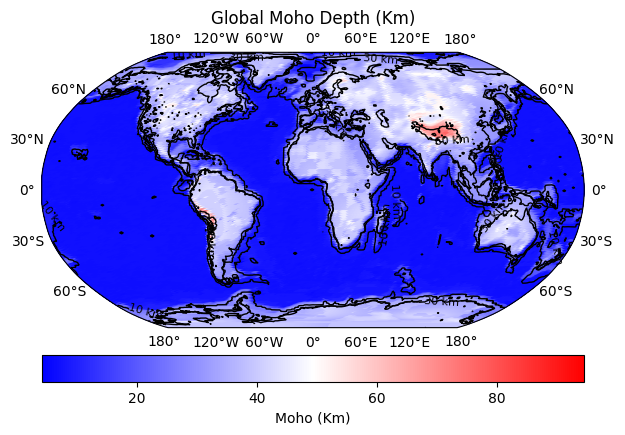

In [92]:
# Now call your unchanged function
fig = plot_moho((df_final_moho["Longitude"], df_final_moho["Latitude"]),df_final_moho["Moho"],"Global Moho Depth (Km)")
#fig.savefig(r"C:/Users/DELL/Pictures/Screenshots/map.png", dpi=300)
plt.show()

In [93]:
df_final_moho.to_csv("moho_depth.csv", index=False)

In [94]:
ds = df_final_moho.to_xarray()
print (ds)

<xarray.Dataset> Size: 3MB
Dimensions:    (index: 85340)
Coordinates:
  * index      (index) int64 683kB 0 1 2 3 4 5 ... 85335 85336 85337 85338 85339
Data variables:
    Latitude   (index) float64 683kB -90.0 -90.0 -89.93 ... -89.5 -89.5 -89.5
    Longitude  (index) float64 683kB 0.0 140.0 144.4 145.0 ... 177.5 178.5 179.5
    Moho       (index) float64 683kB 38.0 26.0 40.0 39.0 ... 39.0 39.0 39.0 39.0


In [96]:
# df to xarray
#ds_all = xr.Dataset.from_dataframe(df_final_moho)
# Save to NetCDF
#ds_all.to_netcdf("weighted_moho_all.nc")
#df_moho = df_final_moho.copy()
# Load your dataframe (ensure df_moho is already defined)
#ds = df_moho.to_xarray()
#print (ds)

df = df_final_moho.copy()

# Define the target grid
lat_grid = np.arange(-90, 90.1, 0.5)
lon_grid = np.arange(-180, 180.1, 0.5)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Create the interpolator object with NearestNDInterpolator
final_moho_func = scipy.interpolate.NearestNDInterpolator(list(zip(df['Longitude'], df['Latitude'])),df['Moho'])

# Evaluate on the grid (lon_mesh, lat_mesh)
grid_z = final_moho_func(lon_mesh, lat_mesh)


# Create DataArray (do not add attrs here yet)
data_array = xr.DataArray(
    grid_z,
    coords={'Latitude': lat_grid, 'Longitude': lon_grid},
    dims=['Latitude', 'Longitude'],
    name='Moho'
)

# Step 5: Wrap in Dataset
ds = data_array.to_dataset()

# Step 6: Add variable-level metadata (must be done after to_dataset)
ds['Moho'].attrs = {
    'units': 'km',
    'long_name': 'Moho Depth',
    'standard_name': 'moho_depth',
    'actual_range': [float(np.nanmin(grid_z)), float(np.nanmax(grid_z))],
    '_FillValue': np.nan,  # Important for GMT/PyGMT compatibility
    'coordinates': 'Latitude Longitude',  # Indicate that these coordinates correspond to lat/lon
}

# Step 7: Add coordinate variable metadata
ds['Latitude'].attrs = {
    'units': 'degrees_north',
    'long_name': 'Latitude',
    'axis': 'Y'
}
ds['Longitude'].attrs = {
    'units': 'degrees_east',
    'long_name': 'Longitude',
    'axis': 'X'
}

# Step 8: Add global metadata
ds.attrs = {
    'title': 'Gridded Moho Depth',
    'summary': 'Interpolated onto regular 0.5x0.5 lat-lon grid',
    #'Conventions': 'CF-1.6',
    'creator_name': 'Your Name or Organization',  # Add creator info
    'institution': 'Your Institution',  # Add institution info
    'source': 'Original dataset details (e.g., source of Moho data)',  # Add data source info
    'history': 'Data processed using NearestNDInterpolator method for interpolation',  # Add processing info
    'date_created': str(pd.to_datetime('today'))  # Add date of creation
}

# Step 9: Save as NetCDF
ds.to_netcdf('global_moho.nc', format='NETCDF4')

<xarray.Dataset> Size: 3MB
Dimensions:    (index: 85340)
Coordinates:
  * index      (index) int64 683kB 0 1 2 3 4 5 ... 85335 85336 85337 85338 85339
Data variables:
    Latitude   (index) float64 683kB -90.0 -90.0 -89.93 ... -89.5 -89.5 -89.5
    Longitude  (index) float64 683kB 0.0 140.0 144.4 145.0 ... 177.5 178.5 179.5
    Moho       (index) float64 683kB 38.0 26.0 40.0 39.0 ... 39.0 39.0 39.0 39.0


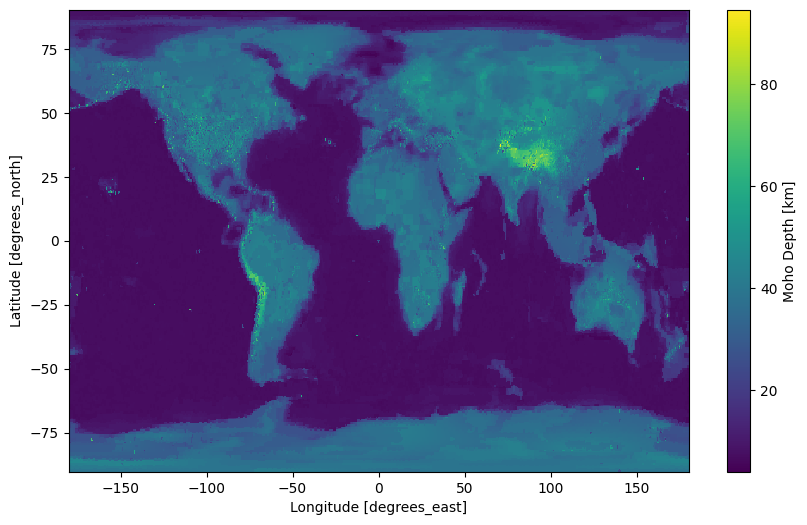

In [3]:
ds_plot = xr.open_dataset('global_moho.nc')
ds_plot['Moho'].plot(figsize=(10,6))